In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("/content/matches.csv")

In [3]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#Data Engineering

In [4]:
df = df.iloc[:,:-1] #dropping umpire3 column as it contains many NaN values
df.dropna(inplace=True) #dropping rows that contains NaN
df = df.drop(['id', 'date', 'player_of_match', 'umpire1', 'umpire2', 'Season','venue','city'], axis=1)

In [5]:
df.head()

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9


In [6]:
df.describe()

,dl_applied,win_by_runs,win_by_wickets
count,743.000000,743.000000,743.000000
mean,0.025572,13.460296,3.375505
std,0.157961,23.626205,3.393397
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000
75%,0.000000,19.000000,6.000000
max,1.000000,146.000000,10.000000


In [7]:
df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [8]:
#for Delhi Capitals
df['team1']=df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
df['team2']=df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
df['winner']=df['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
#for sunrisers Hyderabad
df['team1']=df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['team2']=df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['winner']=df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

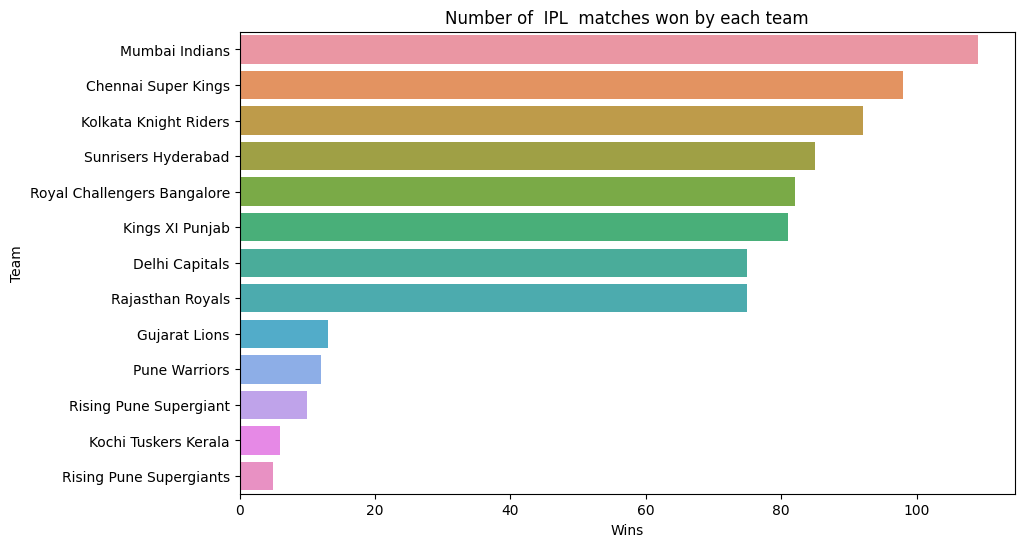

In [9]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = df,order= df['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

Text(0.5, 1.0, 'Toss Decision')

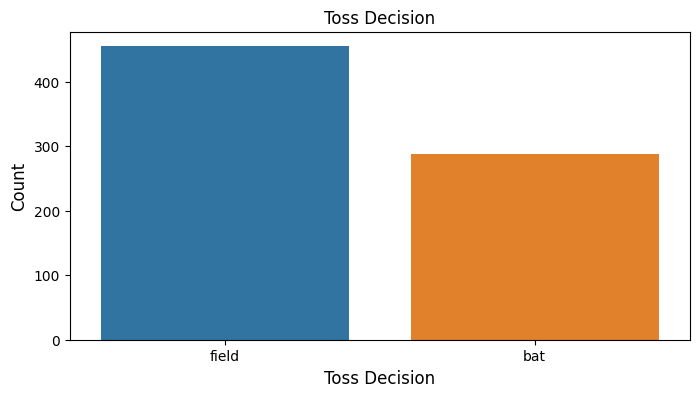

In [10]:
plt.figure(figsize = (8,4))
sns.countplot(x = "toss_decision", data=df)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [11]:
X = df.drop(["winner"], axis=1)
y = df["winner"]

In [12]:
X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True) #To convert to categorical

In [13]:
X.head()

,dl_applied,win_by_runs,win_by_wickets,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Pune Warriors,...,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_tie
0,0,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,7,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,10,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Training

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,max_features = "auto")

In [17]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.9328859060402684
